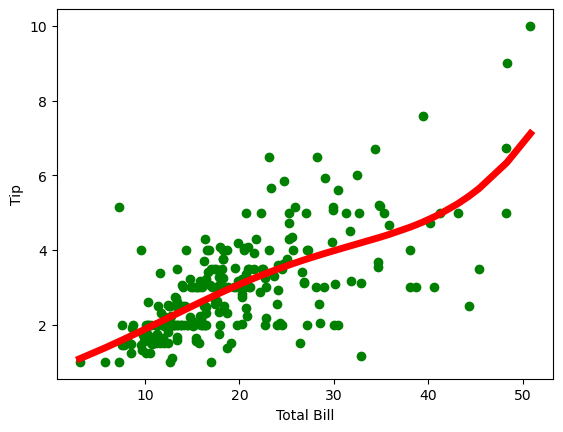

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff=point-x[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    w=(x.T*(wei*x)).I*(x.T*(wei*ymat.T))
    return w

def localWReg(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

def graphPlot(x,ypred):
    sortindex=x[:,1].argsort(0)
    xsort=x[sortindex][:,0]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color='green')
    ax.plot(xsort[:,1],ypred[sortindex],color='red',linewidth=5)
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()
    
data=pd.read_csv('program9csv.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
x=np.hstack((one.T,mbill.T))
ypred=localWReg(x,mtip,8)
graphPlot(x,ypred)